<a href="https://colab.research.google.com/github/M-Sanches/M-Sanches/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando notas em geral

In [23]:
##Importando o pandas (Que utilizaremos para analizar os dados)
import pandas as pd

##Importação do arquivo CSV (Arquivo que consta os nossos dados que serão analisados)
notas = pd.read_csv('ratings.csv')
                
##Imprime as 5 primeiras linhas do arquivo
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
##Trazer mais informações de quantas linhas e quantas colunas possui este arquivo.
notas.shape

(100836, 4)

In [25]:
##Modificando os nomes das colunas para nomes em português
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
##Separando as notas em apenas uma coluna para melhor visualização 
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [27]:
##Verificando quais as possíveis notas que podem estar atribuídas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [28]:
##Para sabermos quantas vezes certo valor aparece(No caso, nota)
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

## Podemos verificar que a nota que mais aparece é a nota 4.0


In [29]:
##Cálculo da média das notas
notas['nota'].mean()

3.501556983616962

## A média das notas apresentada é 3.5


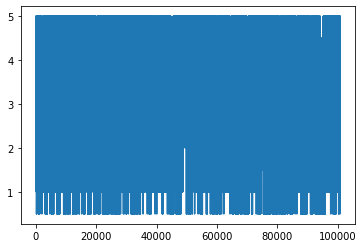

In [30]:
##Método plot do Pandas para mostrar os dados de uma maneira mais visual. 
notas.nota.plot()

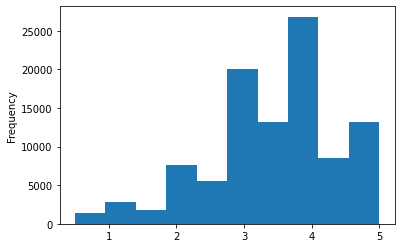

In [31]:
##Visualização melhor referente a quantidade em que as notas aparecem
notas.nota.plot(kind='hist') 

##Podemos observar que a nota 4.0 aparece bastante, em seguida a nota 3 e logo após a nota 5. 

In [32]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [33]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


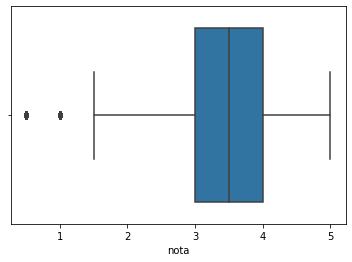

In [34]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [35]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas específicas por filme


In [36]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [37]:
notas_por_filme = notas.groupby("filmeId")


In [38]:
medias_por_filme = notas_por_filme.mean()["nota"]
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

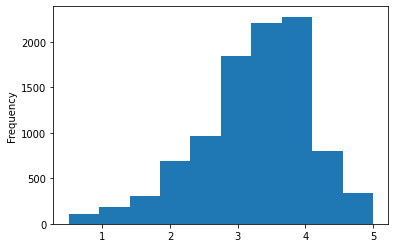

In [39]:
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


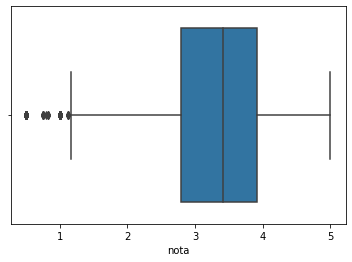

In [40]:
sns.boxplot(medias_por_filme)

In [41]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


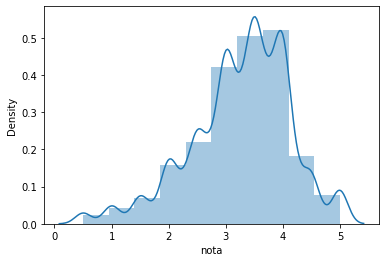

In [42]:
sns.distplot(medias_por_filme, bins=10)

# Analisando Filmes tmdb Kaggle

Text(0.5, 1.0, 'Histograma das médias dos filmes')

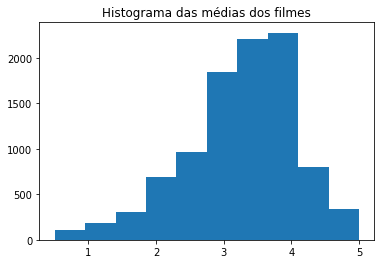

In [43]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [44]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [45]:
tmdb.original_language.unique()


array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta'], dtype=object)

In [46]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language', 'total'] 
contagem_de_lingua.head()

,original_language,total
0,en,2367
1,fr,19
2,zh,13
3,ja,7
4,ru,6


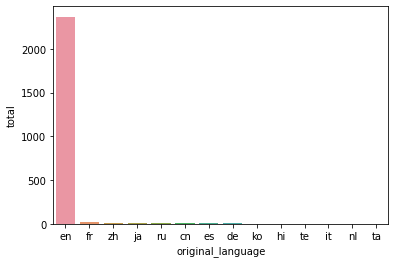

In [47]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

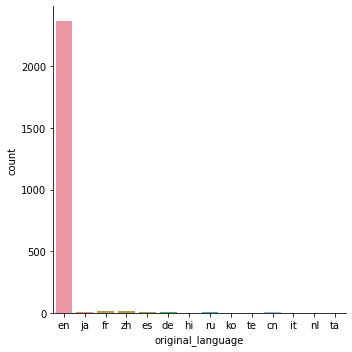

In [48]:
  sns.catplot(x="original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f420bd92250>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'en'),
  Text(1.0874913124609855, -0.16541658115764346, 'fr'),
  Text(1.093392038229083, -0.12039040965646587, 'zh'),
  Text(1.096134218690085, -0.09213997295786835, 'ja'),
  Text(1.0975253770399418, -0.0737431132603825, 'ru'),
  Text(1.098535501060826, -0.0567428665916731, 'cn'),
  Text(1.0992301410636445, -0.04114725965602744, 'es'),
  Text(1.0996695148438866, -0.02696216094846878, 'de'),
  Text(1.099868167809058, -0.01702978098348999, 'ko'),
  Text(1.0999258435670312, -0.012772574265001295, 'hi'),
  Text(1.0999551396137577, -0.009934326211621932, 'te'),
  Text(1.0999771118589305, -0.007096012012787063, 'it'),
  Text(1.099991760156253, -0.00425765056676735, 'nl'),
  Text(1.0999990844081922, -0.0014192607721480325, 'ta')])

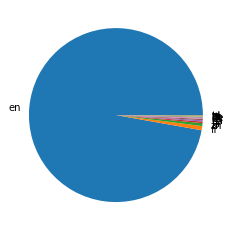

In [49]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [50]:
total_por_lingua=tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles)
print(total_do_resto)


2367
68


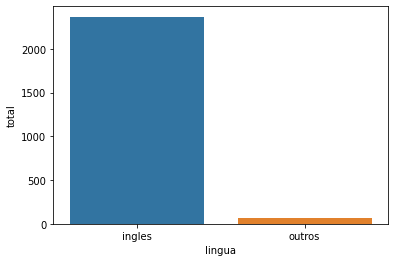

In [51]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
 }
dados = pd.DataFrame(dados)
sns.barplot(x = 'lingua', y= 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7f420bca5d90>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'ingles'),
  Text(1.0957693769727939, -0.0963819095507842, 'outros')])

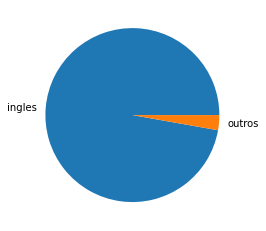

In [52]:
plt.pie(dados["total"], labels = dados["lingua"])

In [53]:
total_por_lingua_de_outros_filmes =tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    19
zh    13
ja     7
ru     6
cn     6
es     5
de     5
ko     2
hi     1
te     1
it     1
nl     1
ta     1
Name: original_language, dtype: int64

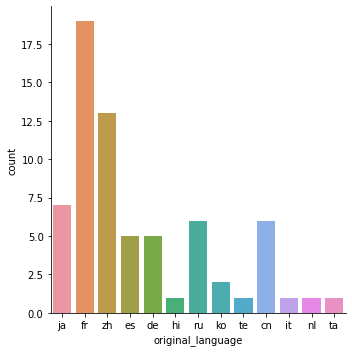

In [54]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')

sns.catplot(x="original_language", kind= "count", data = filmes_sem_lingua_original_em_ingles)

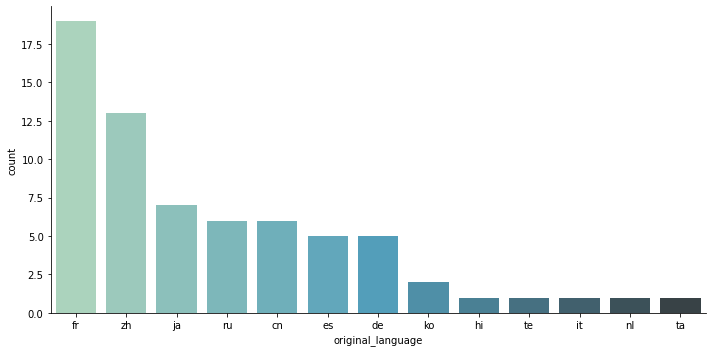

In [64]:


sns.catplot(x="original_language", kind= "count", data = filmes_sem_lingua_original_em_ingles, aspect = 2, palette="GnBu_d" , order = total_por_lingua_de_outros_filmes.index)

# Revisando o papel da média, mediana, medianas de tendência central, dispersão, desvio padrão, box plot, histograma

In [56]:
filmes.head(2) 


,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [57]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [58]:
print("Nota média de Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média de Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média de Toy Story 3.92
Nota média de Jumanji 3.43


In [59]:
print("Mediana de Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana de Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana de Toy Story 4.00
Mediana de Jumanji 3.50


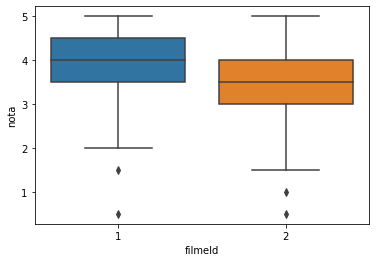

In [61]:
sns.boxplot(x ="filmeId", y = 'nota', data = notas.query("filmeId in [1,2]"))